In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df_exercise = pd.read_csv('drive/MyDrive/exercise.csv')
df_cal = pd.read_csv('drive/MyDrive/calories.csv')

In [ ]:
df_exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [ ]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [ ]:
print('5 data teratas exercise\n', df_exercise.head())
print('\n5 data teratas calories\n', df_cal.head())

5 data teratas exercise
     User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

5 data teratas calories
     User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0


In [ ]:
print('Shape of Exercise', df_exercise.shape)
print('\nShape of Calories\n', df_cal.shape)

Shape of Exercise (15000, 8)

Shape of Calories
 (15000, 2)


In [ ]:
# df_cal = pd.concat([df_exercise, df_cal['Calories']], axis = 1)

In [ ]:
df_exercise = df_exercise.merge(df_cal, on = 'User_ID')

df_exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
df_exercise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
df_exercise.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

1.User_ID : The ID of the person which is unique.

2.Gender : Gender of the person.

3.Age : Age of the person.

4.Height : Height of the person in cm.

5.Weight : Weight of the person in kg.

6.Duration : Duration of the person's exercise/activity.

7.Heart_Rate : Heart rate per min of the person.

8.Body_Temp : Body temperature of the person in C∘.

9.Calories : Calories burned in kilo calories.

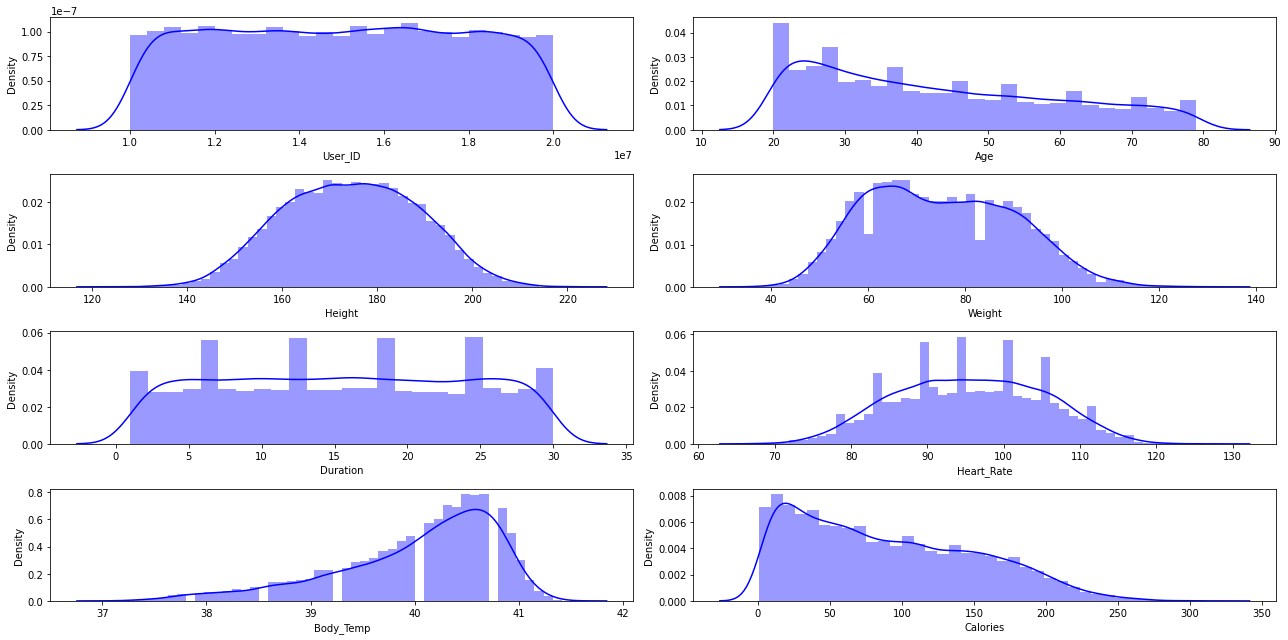

In [ ]:
rows = 4
cols = 2

f, ax = plt.subplots(nrows= rows, ncols=cols, figsize=(18, 9))

col = df_exercise.drop(['Gender'], axis = 1).columns

index = 0

for i in range(rows):
  for k in range(cols):
    sns.distplot(df_exercise[col[index]], ax = ax[i][k], color= 'b')
    index = index + 1

plt.tight_layout()




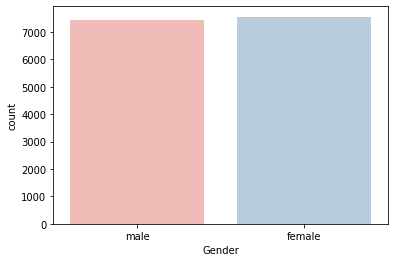

In [ ]:
# plt.figure(figsize = (15, 9))
# sns.pairplot(df_exercise)
sns.countplot(x = 'Gender', data = df_exercise, palette = 'Pastel1')

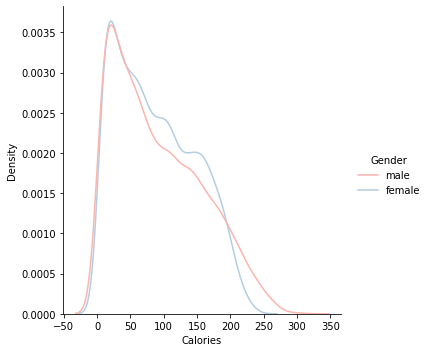

In [ ]:
sns.displot(df_exercise, x = 'Calories', hue ='Gender', kind = 'kde', palette = 'Pastel1')

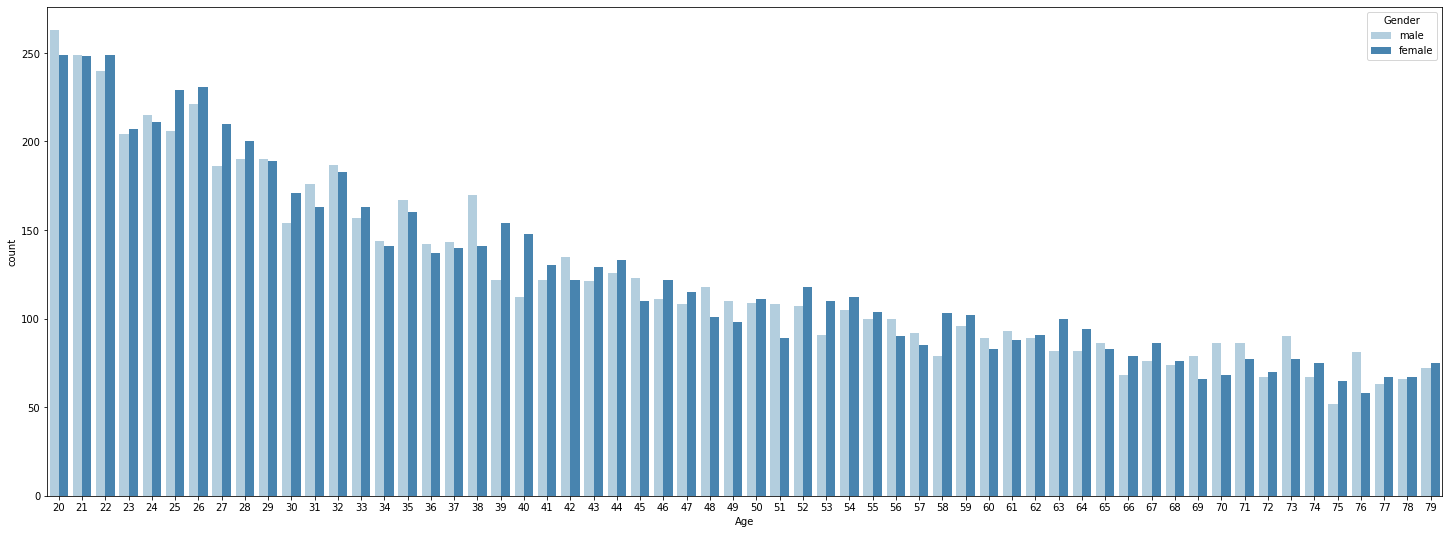

In [ ]:
plt.figure(figsize= (25, 9))
ax = sns.countplot(x = 'Age', hue ='Gender', data = df_exercise, palette = 'Blues')

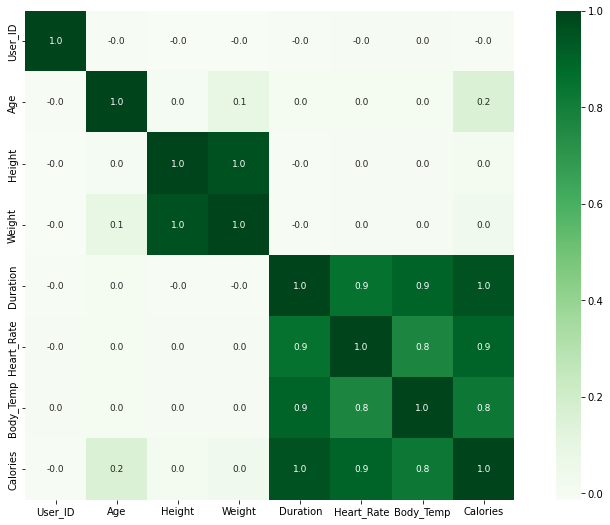

In [ ]:
corr = df_exercise.corr()

plt.figure(figsize = (15, 9))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f',annot = True, annot_kws = {'size' : 9}, cmap = 'Greens')

In [1]:
plt.figure(figsize= (25, 10))

sns.barplot(x = 'Body_Temp', y = 'Heart_Rate', hue = 'Gender', data = df_exercise)


NameError: ignored

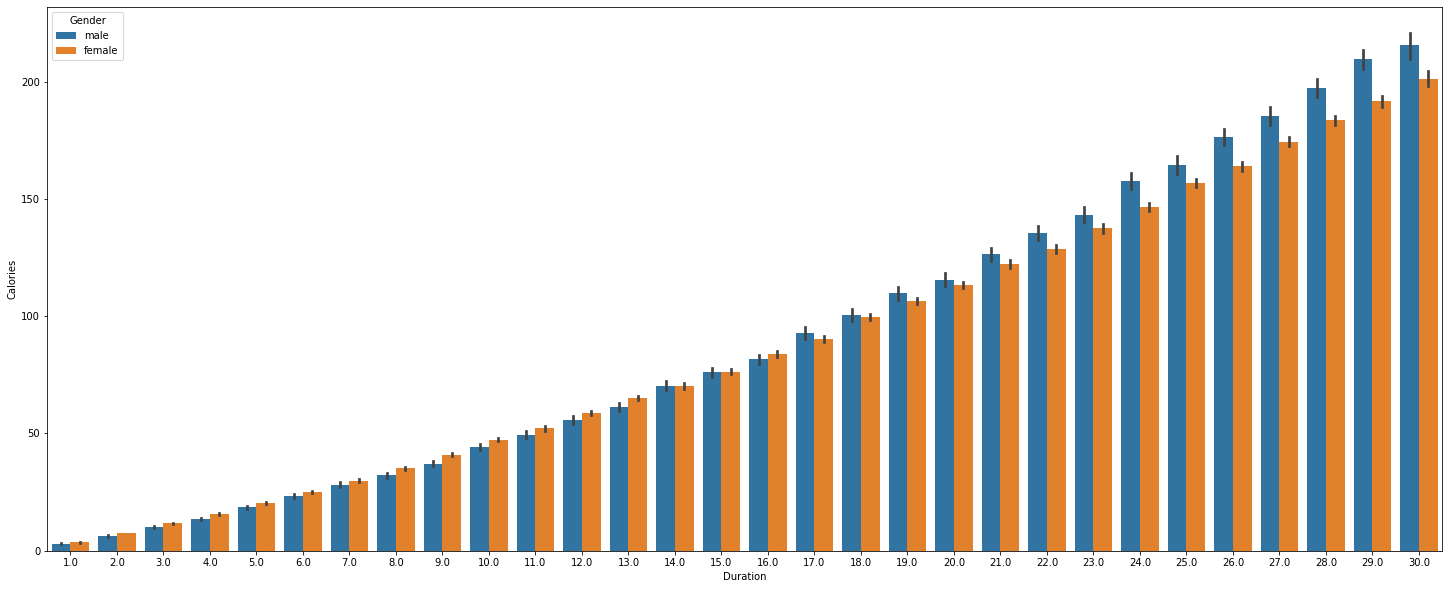

In [ ]:
plt.figure(figsize = (25, 10))

sns.barplot(x = 'Duration', y = 'Calories', hue = 'Gender', data = df_exercise)

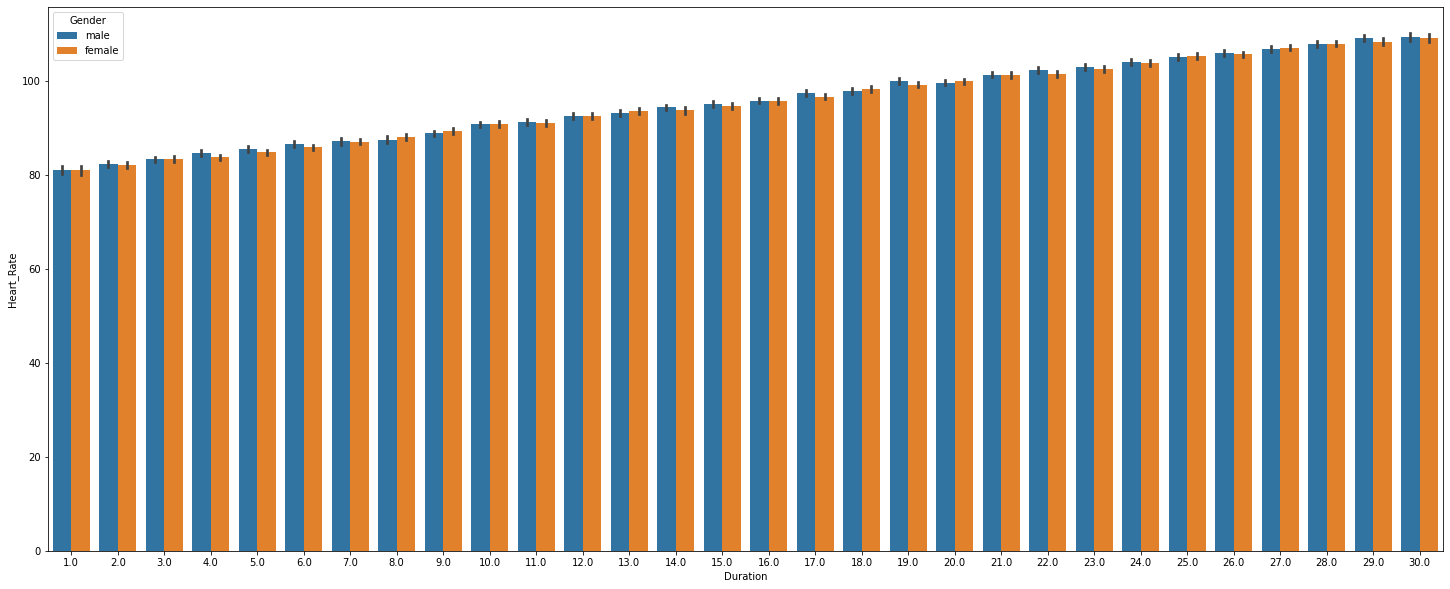

In [ ]:
plt.figure(figsize= (25, 10))

sns.barplot(x = 'Duration', y = 'Heart_Rate', hue = 'Gender', data = df_exercise)


In [ ]:
le = LabelEncoder()

df_exercise['Gender'] = le.fit_transform(df_exercise['Gender'])

In [ ]:
df_exercise = df_exercise.astype('int64')

In [ ]:
df_exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
X = df_exercise.drop(columns= ['User_ID', 'Calories'], axis = 1)
y = df_exercise['Calories']

print(X)
print(y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

In [ ]:
df_exercise.dtypes

User_ID         int64
Gender          int64
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2)


print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)
print('Shape of X, X_train, X_test:', X.shape, X_train.shape, X_test.shape)


# rows = 2
# cols = 1
# fig, axs = plt.subplots(2, 1, figsize =(20, 9))

# col = X_train.columns
# index = 0

 #for m in range(rows):
  #for n in range(cols):
  # sns.distplot(df_exercise[col[index]], ax = ax[i][k], color= 'b'
    #index = index +1

# plt.tight_layout()

Shape of X_train: (12000, 7)
Shape of X_test: (3000, 7)
Shape of y_train: (12000,)
Shape of y_test: (3000,)
Shape of X, X_train, X_test: (15000, 7) (12000, 7) (3000, 7)


In [ ]:
scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg = linreg.fit(X_train, y_train)
y_pred =linreg.predict(X_test)

In [ ]:
mea = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('mea', mea)
print('mse', mse)
print('r2_score', r2)


mea 8.441003586422854
mse 129.90452705588467
r2_score 0.9669255152481213


In [ ]:
from sklearn.linear_model import Lasso 

lasso = Lasso()
lasso = lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

mea_lasso = mean_absolute_error(y_test, y_pred)
mse_lasso = mean_squared_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)

print('mea', mea_lasso)
print('mse', mse_lasso)
print('r2_score', r2_lasso)


mea 9.027649191197145
mse 152.45108296586025
r2_score 0.9611850246235639


In [ ]:
from xgboost import XGBRegressor

xgbreg = XGBRegressor()
xgbreg = xgbreg.fit(X_train, y_train)
y_pred = xgbreg.predict(X_test)
mea = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('mea', mea)
print('mse', mse)
print('r2_score', r2)

[05:56:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mea 2.786436436076959
mse 14.89395316496483
r2_score 0.9962079087002264


In [ ]:
# pickle 

import pickle 

filename = 'deploy_lat_calories_burned.sav'
pickle.dump(mea_lasso, open(filename, 'wb'))
loaded_model = pickle.load(open('deploy_lat_calories_burned.sav', 'rb'))

In [ ]:
-------------- error ---------------------

SyntaxError: ignored

In [ ]:
import plotly.express as px

fig = px.box(X_train, x = 'Age', y ='Calories', color = 'Gender')

fig.update_layout(
    width = 700, 
    height = 450,
)

fig.show()

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

models = {}
y_pred = {}


models['Linear Regression:'] = LinearRegression()
models['Lasso'] = Lasso()
models['SVR:'] = SVR()
models['XGBRegressor:'] = XGBRegressor()
models['RandomForestRegressor:'] = RandomForestRegressor()


for m in models:
  models[m].fit(X_train, y_train)
  y_pred = models[m].predict(X_test)# ini error karena float??

[06:00:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = {}
mae = {}
r2 = {}

for models in y_pred:
  mse[models] = mean_absolute_error(y_test, y_pred[models])
  mae[models] = mean_squared_error(y_test, y_pred[models])
  r2[models] = r2_score(y_test, y_pred[models])

  
  print("\n{}:".format(models), r2[models])
  print('mae\n{}:'.format(models), mae[models])
  print("mse\n{}:".format(models), mse[models])

IndexError: ignored